In [16]:
import sqlite3

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

from utils.env_variables import SQLITE_DB

In [3]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\south-africa-street-history-mapping


In [4]:
conn = sqlite3.connect(SQLITE_DB)

In [6]:
df = pd.read_sql_query("select term, language, max(likelihood) as likelihood "
                  "from terms_language_dictionary "
                  "group by term", conn)
df

,term,language,likelihood
0,aachen,german,80.103617
1,aadil,spanish,30.409652
2,aal,dutch,36.279644
3,aalwyn,afrikaans,77.713695
4,aalwynanker,afrikaans,67.683845
...,...,...,...
60573,zygia,german,16.712408
60574,zyl,afrikaans,39.057734
60575,zylena,sotho,38.842485
60576,zyster,afrikaans,30.909024


In [9]:
# Calculating mean and Stdev of likelihood
df_mean = np.mean(df["likelihood"])
df_mean

44.814659120652685

In [10]:
df_std = np.std(df["likelihood"])
df_std

19.607242201816547

In [14]:
# Calculating probability density function (PDF)
pdf = norm.pdf(df["likelihood"].sort_values(), df_mean, df_std)
pdf

array([0.00474853, 0.00482577, 0.00487108, ..., 0.00038756, 0.00038756,
       0.00038756])

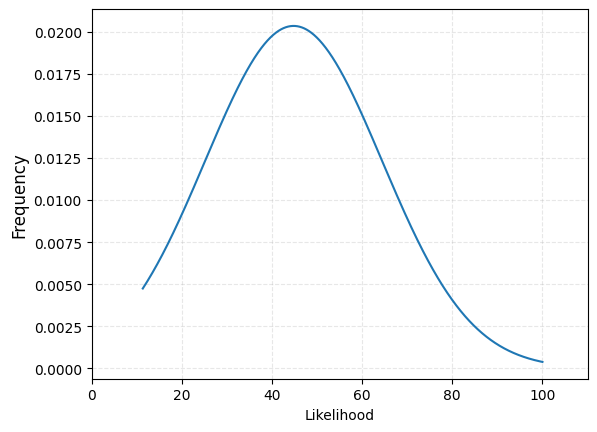

In [21]:
# Drawing a graph
plt.plot(df["likelihood"].sort_values(), pdf)
plt.xlim([0,110])  
plt.xlabel("Likelihood")    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()